In [2]:
from sklearn.datasets import fetch_mldata
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsOneClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
mnist = fetch_mldata('MNIST original')

c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [4]:
X, y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


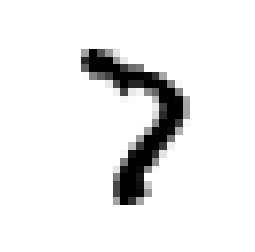

7.0


In [5]:
some_digit = X[42000]
some_digit_image = some_digit.reshape(28,28)
some_label = y[42000]
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()
print(some_label)

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[:60000]

In [7]:
shuffled_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffled_index], y[shuffled_index]

In [8]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)
sgd_clf.predict([some_digit])

c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([False])

In [9]:
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameter

array([0.9581 , 0.94085, 0.96525])

In [10]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y = None): 
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype = bool)

never5_clf = Never5Classifier()
cross_val_score(never5_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy')

array([0.9111 , 0.9065 , 0.91135])

In [11]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameter

In [12]:
confusion_matrix(y_train_5, y_train_pred)

array([[53332,  1247],
       [ 1469,  3952]], dtype=int64)

In [13]:
print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))
print(f1_score(y_train_5, y_train_pred))

0.7601461819580688
0.7290167865707434
0.744256120527307


In [14]:
y_train_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method = 'decision_function')

c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameter

In [15]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_train_scores)

In [16]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'Recall')
    plt.xlabel("Threshold")
    plt.legend(loc = "upper left")
    plt.ylim([0,1])

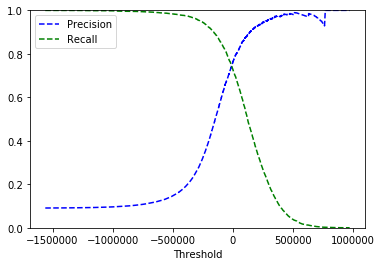

In [17]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [18]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b--")
    plt.xlabel("Recall")
    plt.ylim([0,1])

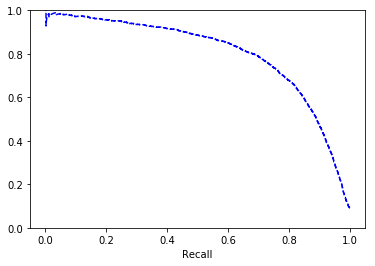

In [19]:
plot_precision_vs_recall(precisions, recalls)

In [20]:
y_train_pred_90 = (y_train_scores > 16973.76)
print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90))
print(f1_score(y_train_5, y_train_pred_90))

0.7862311350010337
0.7015310828260468
0.7414700721388185


In [21]:
fpr, tpr, threshold = roc_curve(y_train_5, y_train_scores)

In [22]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

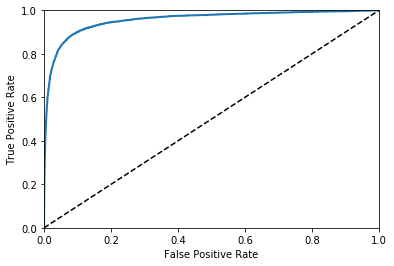

In [23]:
plot_roc_curve(fpr, tpr)
plt.show()

In [24]:
roc_auc_score(y_train_5, y_train_scores)

0.9563358957287447

In [25]:
forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3, method = 'predict_proba')
y_train_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_train_scores_forest)

c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


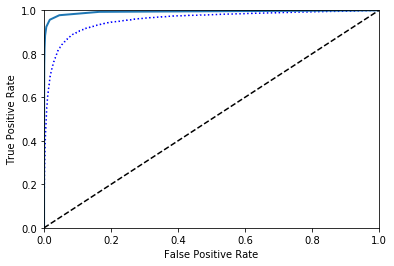

In [26]:
plt.plot(fpr, tpr, "b:", label = "SGD")
plot_roc_curve(fpr_forest, tpr_forest, label = "Random Forest")
plt.show()

In [27]:
roc_auc_score(y_train_5, y_train_scores_forest)

0.9928651914183151

In [28]:
y_train_pred_forest = (y_train_scores_forest >= 0.5)
print(precision_score(y_train_5, y_train_pred_forest))
print(recall_score(y_train_5, y_train_pred_forest))
print(f1_score(y_train_5, y_train_pred_forest))

0.9665322580645161
0.884338682899834
0.9236104421539351


In [29]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([7.])

In [30]:
some_digit_scores = sgd_clf.decision_function([some_digit])
print(some_digit_scores)

[[-292105.99158601 -597991.69615668  -82134.64341526 -284882.48732193
  -282501.19360909 -439833.04951265 -572921.25344386   25588.94684339
  -467447.7408456  -444497.38515868]]


In [31]:
np.argmax(some_digit_scores)

7

In [32]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [33]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state = 42))
ovo_clf.fit(X_train, y_train)

c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameter

c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameter

c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameter

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
          n_jobs=None)

In [34]:
ovo_clf.predict([some_digit])

array([7.])

In [35]:
len(ovo_clf.estimators_)

45

In [36]:
forest_clf.fit(X_train, y_train)

c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [37]:
forest_clf.predict([some_digit])

array([7.])

In [38]:
forest_clf.predict_proba([some_digit])

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [39]:
cross_val_score(forest_clf, X_train, y_train, cv = 3, scoring = "accuracy")

array([0.93916217, 0.94339717, 0.94089113])

In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(forest_clf, X_train_scaled, y_train, cv = 3, scoring = "accuracy")

array([0.93926215, 0.94344717, 0.94094114])

In [41]:
y_train_pred = cross_val_predict(forest_clf, X_train_scaled, y_train, cv = 3)

In [42]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5799,    3,   20,   11,    5,   17,   26,    4,   34,    4],
       [   1, 6633,   38,   14,   11,   13,    8,   10,    8,    6],
       [  58,   28, 5619,   52,   47,   12,   28,   47,   60,    7],
       [  30,   17,  124, 5673,    9,  108,    5,   52,   70,   43],
       [  18,   24,   29,    7, 5553,   11,   28,   20,   24,  128],
       [  61,   16,   25,  199,   27, 4931,   60,   13,   53,   36],
       [  54,   15,   34,    4,   35,   69, 5683,    1,   22,    1],
       [   9,   39,   78,   18,   74,    6,    2, 5934,   17,   88],
       [  31,   55,   98,  128,   60,   93,   56,   19, 5245,   66],
       [  31,   16,   38,   70,  185,   50,    6,   90,   60, 5403]],
      dtype=int64)

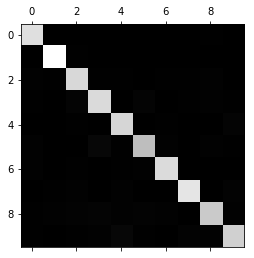

In [43]:
plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.show()

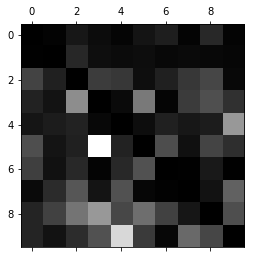

In [44]:
row_sum = conf_mx.sum(axis  = 1, keepdims = True)
norm_conf_mx = conf_mx/row_sum
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)
plt.show()

In [45]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

In [46]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

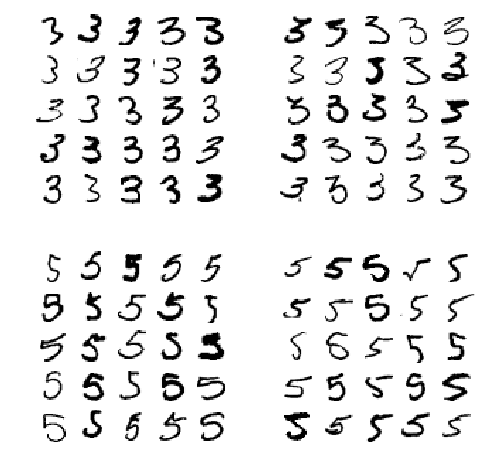

In [47]:
plt.figure(figsize = (8, 8))
plt.subplot(221); plot_digits(X_aa[:25,:], images_per_row = 5)
plt.subplot(222); plot_digits(X_ab[:25,:], images_per_row = 5)
plt.subplot(223); plot_digits(X_ba[:25,:], images_per_row = 5)
plt.subplot(224); plot_digits(X_bb[:25,:], images_per_row = 5)
plt.show()

In [53]:
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [48]:
knn_clf.predict([some_digit])

array([[ True,  True]])

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv = 3)

In [ ]:
f1_score(y_multilabel, y_train_knn_pred, average = "macro")

In [50]:
noise = np.random.randint(0,100, (len(X_train), 784))
X_train_mod = X_train + noise
y_train_mod = X_train

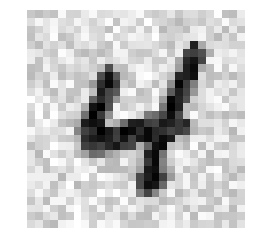

In [51]:
some_digit_mod = X_train_mod[42000]
some_digit_image = some_digit_mod.reshape(28,28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

In [54]:
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
clean_digit = knn_clf.predict([some_digit_mod])

In [ ]:
some_digit_image = clean_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()